# **Flight Fare Price Prediction**

# Importing Libraries

In [162]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stat
import pylab
from scipy.stats import norm

pd.options.display.max_columns

0

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
df=pd.read_excel('/content/drive/MyDrive/Machine Learning Projects/4. Flight Fare Prediction/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [165]:
df.shape

(10683, 11)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [167]:
df.describe()

,Price
count,10683.00
mean,9087.06
std,4611.36
min,1759.00
25%,5277.00
50%,8372.00
75%,12373.00
max,79512.00


Checking NULL Values

In [168]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We have just 2 missing values , so we can drop them easily.

In [169]:
df.dropna(inplace=True)

Now its time to convert some columns into date-time.

In [170]:
def convert_datetime(col):
  df[col]=pd.to_datetime(df[col])

In [171]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [172]:
for x in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    convert_datetime(x)

In [173]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [174]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-16 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-16 05:50:00,2021-04-16 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-16 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-16 18:05:00,2021-04-16 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-16 16:50:00,2021-04-16 21:35:00,4h 45m,1 stop,No info,13302


In [175]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [176]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-16 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-16 05:50:00,2021-04-16 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-16 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-16 18:05:00,2021-04-16 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-16 16:50:00,2021-04-16 21:35:00,4h 45m,1 stop,No info,13302,3,1


Since we have extracted all info from Dat of Journey column, it would be better to drop it.

In [177]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [178]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-04-16 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-16 05:50:00,2021-04-16 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-16 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-04-16 18:05:00,2021-04-16 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-04-16 16:50:00,2021-04-16 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [179]:
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [180]:
df1=df.copy()

In [181]:
extract_hour(df1,'Dep_Time')
extract_min(df1,'Dep_Time')
drop_col(df1,'Dep_Time')

In [182]:
df1.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-04-16 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-04-16 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [183]:
extract_hour(df1,'Arrival_Time')
extract_min(df1,'Arrival_Time')
drop_col(df1,'Arrival_Time')

In [184]:
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [185]:
list(df1['Duration'])

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [186]:
duration=list(df1['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]

In [187]:
df1['Duration']=duration

In [188]:
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Now we will extract hours and minute from Duration Column

In [189]:
df1['Duration'][0].split(' ')

['2h', '50m']

In [190]:
df1['Duration'][0].split(' ')[0]

'2h'

In [191]:
df1['Duration'][0].split(' ')[0][0:-1]

'2'

In [192]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [193]:
df1['Duration_hours']=df1['Duration'].apply(hour)
df1['Duration_min']=df1['Duration'].apply(minute)

In [194]:
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [195]:
df1.drop('Duration',axis=1,inplace=True)

In [196]:
df1.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hours       object
Duration_min         object
dtype: object

In [197]:
df1['Duration_hours']= df1['Duration_hours'].astype(int)
df1['Duration_min']= df1['Duration_min'].astype(int)

In [198]:
df1.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hours        int64
Duration_min          int64
dtype: object

In [199]:
df1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


Extracting Categorical Columns

In [200]:
cat_col=[x for x in df1.columns if df1[x].dtype=='object']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Extracting Continuous Columns

In [201]:
cont_col=[x for x in df1.columns if x not in cat_col]
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hours',
 'Duration_min']

NUmber of Categories in Each Categorical Data

In [202]:
for x in cat_col:
    print('--------------------------')
    print(x)
    print('--------------------------')
    print(df1[x].value_counts())

--------------------------
Airline
--------------------------
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
--------------------------
Source
--------------------------
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
--------------------------
Destination
--------------------------
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
--------------------------


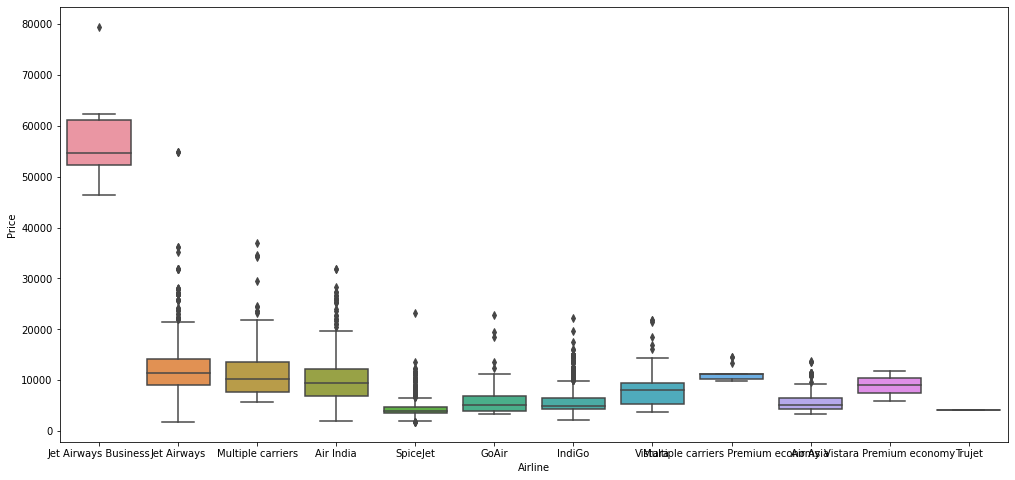

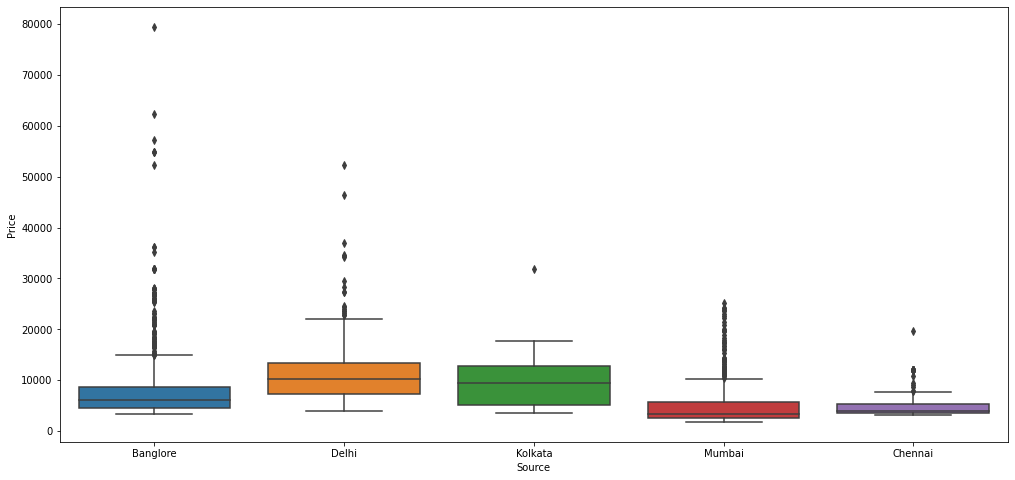

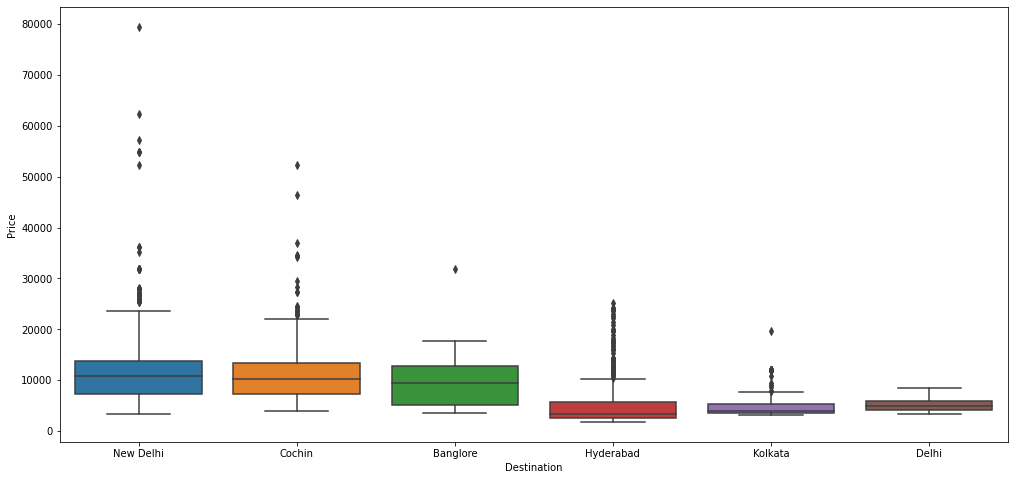

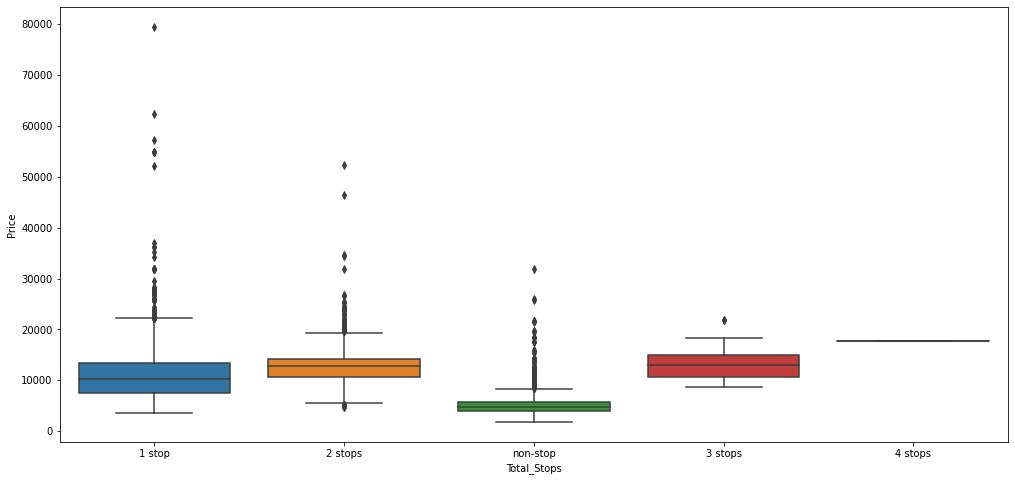

In [203]:
for col in['Airline','Source','Destination','Total_Stops']:
    plt.figure(figsize=(17,8))
    sns.boxplot(x=col, y='Price',data=df1.sort_values('Price',ascending=False))
    plt.show()

# Converting Categorical Data into Numerical Data

In [204]:
df2=df1.copy()

In [205]:
df1['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

We will pick up top -8 categories for one hot encoding

In [206]:
top_8_Airline=[x for x in df1['Airline'].value_counts().nlargest(8).index]
top_8_Airline

['Jet Airways',
 'IndiGo',
 'Air India',
 'Multiple carriers',
 'SpiceJet',
 'Vistara',
 'Air Asia',
 'GoAir']

In [207]:
for col in top_8_Airline:
    df2[col]=np.where(df2['Airline']==col,1,0)

In [208]:
df2.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Jet Airways,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,1,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45,0,1,0,0,0,0,0,0


Perform One hot encoding in Destination and Source Columns

In [209]:
df2=pd.get_dummies(df2,columns=['Destination','Source'],drop_first=True)

In [210]:
df2.head()

,Airline,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Jet Airways,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Air India,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,IndiGo,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,IndiGo,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [211]:
df3=df2.drop('Route',axis=1)

In [212]:
df3.head()

,Airline,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Jet Airways,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Air India,2 stops,No info,7662,5,1,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,2 stops,No info,13882,6,9,9,25,4,25,19,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,IndiGo,1 stop,No info,6218,5,12,18,5,23,30,5,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,IndiGo,1 stop,No info,13302,3,1,16,50,21,35,4,45,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Number of Categories in Each Route Column

In [213]:
df3.columns

Index(['Airline', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month', 'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Duration_hours', 'Duration_min', 'Jet Airways',
       'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet', 'Vistara',
       'Air Asia', 'GoAir', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

Deleting Unwanted Columns

In [214]:
df3['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [215]:
Stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [216]:
df3['Total_Stops']=df3['Total_Stops'].map(Stops)

In [217]:
df3.head()

,Airline,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Jet Airways,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,0,No info,3897,24,3,22,20,1,10,2,50,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Air India,2,No info,7662,5,1,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,2,No info,13882,6,9,9,25,4,25,19,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,IndiGo,1,No info,6218,5,12,18,5,23,30,5,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,IndiGo,1,No info,13302,3,1,16,50,21,35,4,45,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [218]:
df3.drop(['Airline', 'Additional_Info'],axis=1,inplace=True)

In [219]:
df3.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Jet Airways,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,5,1,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,6,9,9,25,4,25,19,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,3,1,16,50,21,35,4,45,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [220]:
df3.shape

(10682, 27)

In [221]:
df3.dtypes

Total_Stops              int64
Price                    int64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_min             int64
Arrival_Time_hour        int64
Arrival_Time_min         int64
Duration_hours           int64
Duration_min             int64
Jet Airways              int64
IndiGo                   int64
Air India                int64
Multiple carriers        int64
SpiceJet                 int64
Vistara                  int64
Air Asia                 int64
GoAir                    int64
Destination_Cochin       uint8
Destination_Delhi        uint8
Destination_Hyderabad    uint8
Destination_Kolkata      uint8
Destination_New Delhi    uint8
Source_Chennai           uint8
Source_Delhi             uint8
Source_Kolkata           uint8
Source_Mumbai            uint8
dtype: object

In [222]:
df4=df3.copy()

In [223]:
df4.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Jet Airways,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,5,1,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,6,9,9,25,4,25,19,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,3,1,16,50,21,35,4,45,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [224]:
df4['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [226]:
df4.rename(columns={'Jet Airways':'Jet_Airways',
                    'Air India':'Air_India',
                    'Multiple carriers':'Multiple_carriers',
                    'Air Asia':'Air_Asia',
                    'Destination_New Delhi':'Destination_New_Delhi'}, inplace=True)

In [227]:
df4.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Jet_Airways,IndiGo,Air_India,Multiple_carriers,SpiceJet,Vistara,Air_Asia,GoAir,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,5,1,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,6,9,9,25,4,25,19,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,3,1,16,50,21,35,4,45,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [264]:
df4.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min',
       'Duration_hours', 'Duration_min', 'Jet_Airways', 'IndiGo', 'Air_India',
       'Multiple_carriers', 'SpiceJet', 'Vistara', 'Air_Asia', 'GoAir',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New_Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [228]:
X=df4.drop('Price',axis=1)
Y=df4['Price']

In [229]:
X.shape

(10682, 26)

In [230]:
X.dtypes

Total_Stops              int64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_min             int64
Arrival_Time_hour        int64
Arrival_Time_min         int64
Duration_hours           int64
Duration_min             int64
Jet_Airways              int64
IndiGo                   int64
Air_India                int64
Multiple_carriers        int64
SpiceJet                 int64
Vistara                  int64
Air_Asia                 int64
GoAir                    int64
Destination_Cochin       uint8
Destination_Delhi        uint8
Destination_Hyderabad    uint8
Destination_Kolkata      uint8
Destination_New_Delhi    uint8
Source_Chennai           uint8
Source_Delhi             uint8
Source_Kolkata           uint8
Source_Mumbai            uint8
dtype: object

In [231]:
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [232]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [233]:
X_train.shape, Y_train.shape

((8545, 26), (8545,))

In [234]:
X_test.shape,Y_test.shape

((2137, 26), (2137,))

In [235]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,Y_train)
    print('Training score : {}'.format(model.score(X_train,Y_train)))
    y_pred = model.predict(X_test)
    
    
    print('predictions are: \n {}'.format(y_pred))
    print('\n')

    r2_score=metrics.r2_score(Y_test,y_pred)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error( Y_test ,y_pred))
    print('MSE:',metrics.mean_squared_error(Y_test,y_pred))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
    sns.distplot(Y_test-y_pred)
    plt.show()

    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('/content/drive/MyDrive/Machine Learning Projects/4. Flight Fare Prediction/model.pkl','wb')
        pickle.dump(model,file)

In [236]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9515448996673471
predictions are: 
 [16703.29        7995.63        8886.3        ...  6682.77
 12868.64707143 13045.98216667]


r2 score: 0.7603403665444562
MAE: 1234.2708485322844
MSE: 5167554.515196403
RMSE: 2273.2255750796935


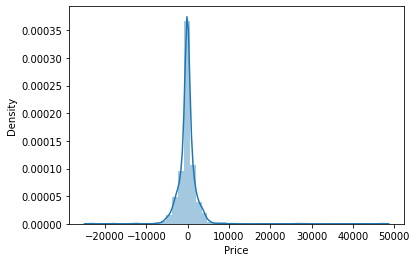

In [237]:
predict(RandomForestRegressor(),0)

Training score : 0.9371249759601816
predictions are: 
 [16656.633   7016.9897  8408.861  ...  6685.596  12640.561  12668.723 ]


r2 score: 0.7969762039613061
MAE: 1184.7854791622492
MSE: 4377610.525331452
RMSE: 2092.274008186177


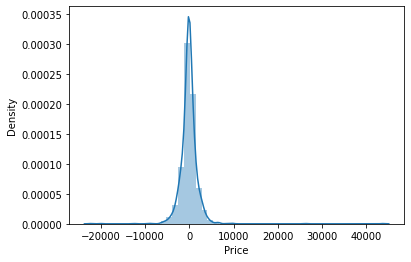

In [238]:
from xgboost import XGBRegressor
predict(XGBRegressor(),0)

Training score : 0.8709932370311827
predictions are: 
 [17547.73179883  6504.021187    9158.10104805 ...  6820.84205191
 12067.26675426 12248.88311765]


r2 score: 0.8200050692374712
MAE: 1263.7430051959973
MSE: 3881060.8351652483
RMSE: 1970.040820685005


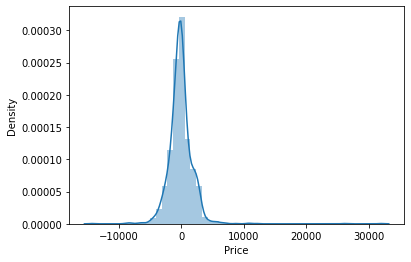

In [239]:
import lightgbm as ltb
predict(ltb.LGBMRegressor(),0)

# Hyperparameters

In [240]:
from sklearn.model_selection import RandomizedSearchCV

In [251]:
#LightGBMRegressor

boosting_type= ['gbdt','rf']
max_depth=[int(x) for x in np.linspace(100,1000,10)]
learning_rate=[0.01, 0.02,0.05,0.07, 0.1,0.2,0.3]
n_estimators=[ int(x) for x in np.linspace(100,1000,10)]

grid={'boosting_type':boosting_type,
      'max_depth':max_depth,
      'learning_rate':learning_rate,
      'n_estimators':n_estimators}
grid

{'boosting_type': ['gbdt', 'rf'],
 'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.1, 0.2, 0.3],
 'max_depth': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [252]:
lgbm_grid=RandomizedSearchCV(estimator=ltb.LGBMRegressor(), param_distributions=grid,
                           n_iter=100,cv=3,verbose=2, n_jobs=-1)
lgbm_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'rf'],
                                        'learning_rate': [0.01, 0.02, 0.05,
                                                          0.07, 0.1, 0.2, 0.3],
                                        'max_depth': [100, 200, 300, 400, 500,
                                                      600, 700, 800, 900,
                                                      1000],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=2)

In [253]:
lgbm_grid.best_params_


{'boosting_type': 'gbdt',
 'learning_rate': 0.05,
 'max_depth': 500,
 'n_estimators': 800}

Training score : 0.922218016798028
predictions are: 
 [17054.4933164   6665.1535652   8637.93528705 ...  6613.61607097
 12432.16019815 12640.40504953]


r2 score: 0.8303372403777818
MAE: 1170.6524180695608
MSE: 3658277.9790869905
RMSE: 1912.6625366454455


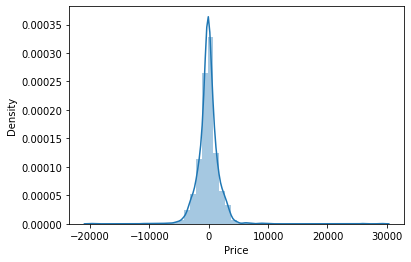

In [259]:
predict(lgbm_grid.best_estimator_,1)

In [257]:
import pickle

In [260]:
file=open('/content/drive/MyDrive/Machine Learning Projects/4. Flight Fare Prediction/model.pkl','rb')
lgbm =pickle.load(file)

In [261]:
y_prediction=lgbm.predict(X_test)
y_prediction

array([17054.4933164 ,  6665.1535652 ,  8637.93528705, ...,
        6613.61607097, 12432.16019815, 12640.40504953])

In [262]:
metrics.r2_score(Y_test,y_prediction)

0.8303372403777818

In [263]:
df4.to_csv('Flight Fare Prediction Model csv.csv')